<a href="https://www.kaggle.com/code/zziggu/titanic?scriptVersionId=124777002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

titanic



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train = pd.read_csv('/kaggle/input/titanic/train.csv')  # training dataframe
test  = pd.read_csv('/kaggle/input/titanic/test.csv')  
submission  = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')  # test dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


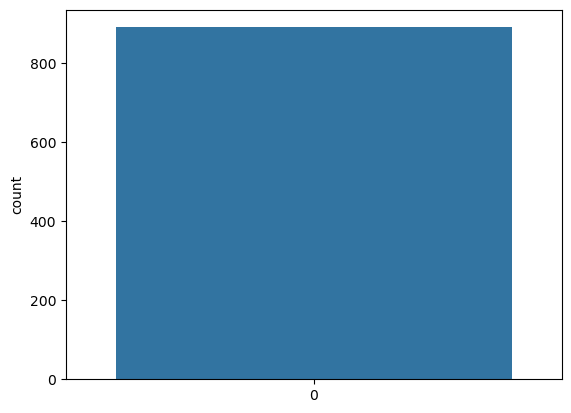

In [3]:

import seaborn as sns
import pandas as pd

# 데이터를 불러오는 코드
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test  = pd.read_csv('/kaggle/input/titanic/test.csv')  
submission  = pd.read_csv('/kaggle/input/titanic/gender_submission.csv') 
# 생존 여부에 따른 막대 그래프
sns.countplot(train['Survived'])
# 생존 여부의 개수 출력
print(train['Survived'].value_counts())


In [4]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
train=train.drop(columns='Cabin')
test=test.drop(columns='Cabin')

<AxesSubplot:xlabel='Sex', ylabel='count'>

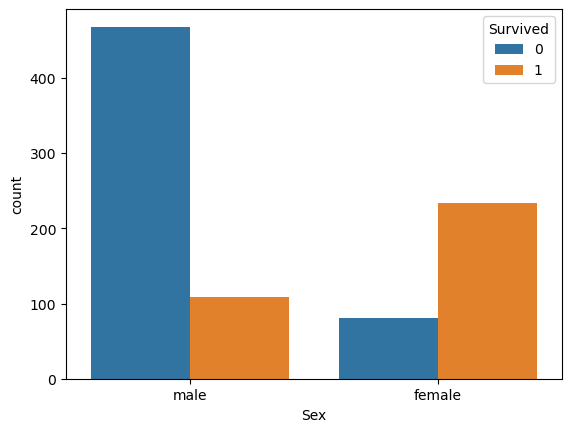

In [6]:
sns.countplot(data=train, x='Sex', hue='Survived')

In [7]:
train.loc[train['Sex']=='male', 'Sex']=0
train.loc[train['Sex']=='female','Sex']=1
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1

<AxesSubplot:xlabel='Pclass', ylabel='count'>

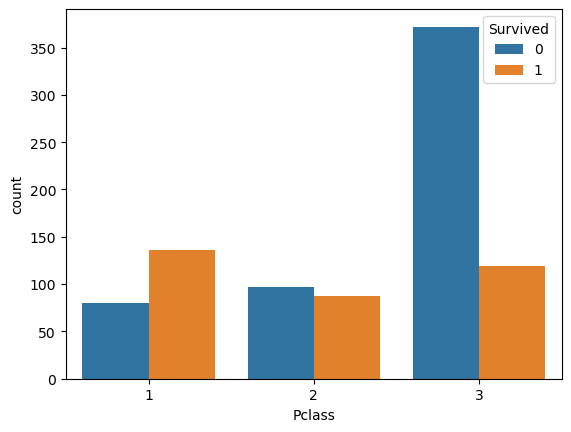

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [9]:
train['Pclass_3']=(train['Pclass']==3)
train['Pclass_2']=(train['Pclass']==2)
train['Pclass_1']=(train['Pclass']==1)

test['Pclass_3']=(test['Pclass']==3)
test['Pclass_2']=(test['Pclass']==2)
test['Pclass_1']=(test['Pclass']==1)

In [10]:
train=train.drop(columns='Pclass')
test=test.drop(columns='Pclass')

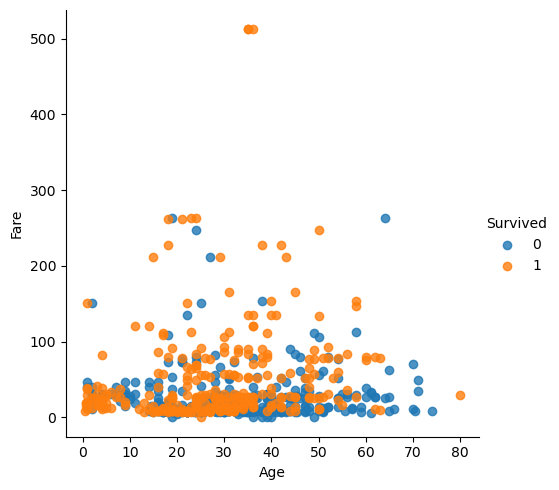

In [11]:
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False, hue='Survived')

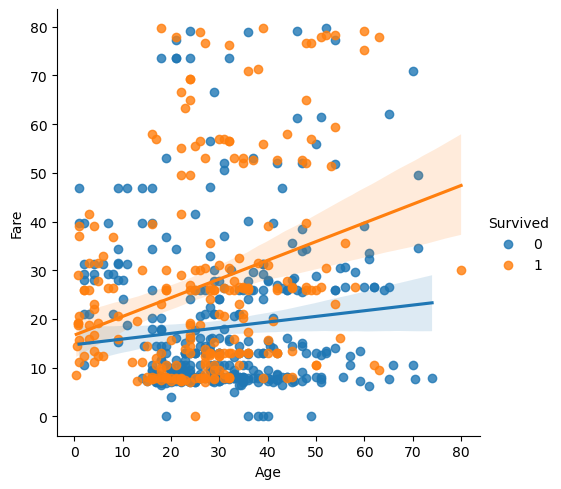

In [12]:
LowFare=train[train['Fare']<80]
sns.lmplot(data=LowFare, x='Age', y='Fare', hue='Survived')

In [13]:
test.loc[test['Fare'].isnull(),'Fare']=0

In [14]:
train=train.drop(columns='Age')
test=test.drop(columns='Age')

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

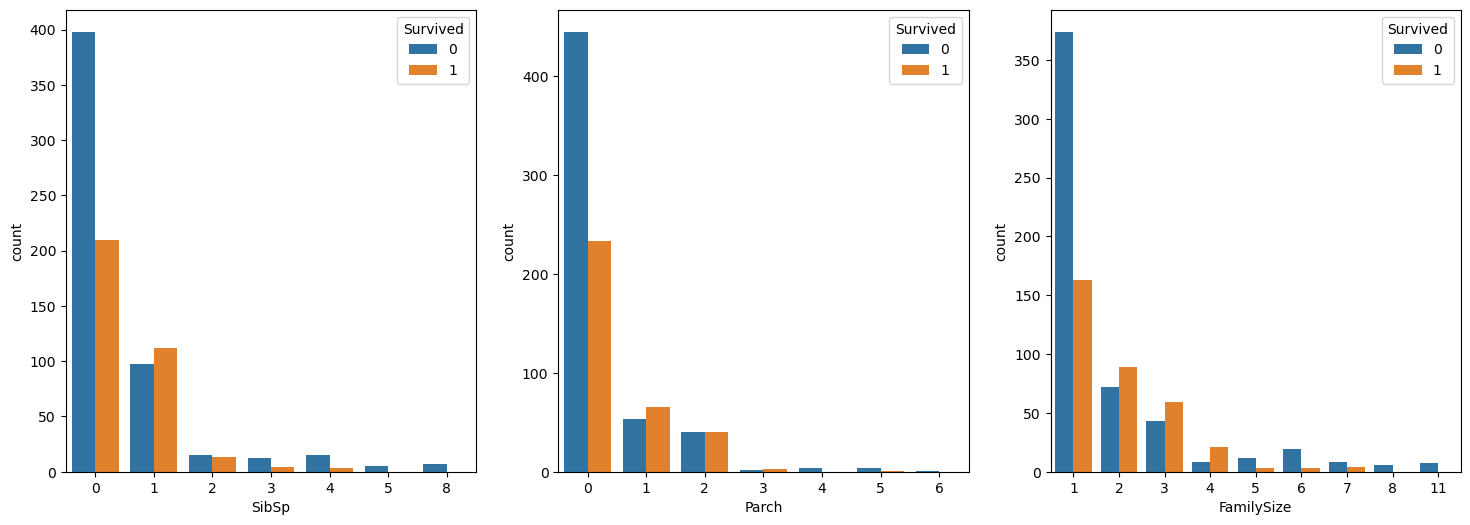

In [15]:
import matplotlib.pyplot as plt


train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax2)
sns.countplot(data=train, x='FamilySize',hue='Survived', ax=ax3)

<AxesSubplot:xlabel='Big', ylabel='count'>

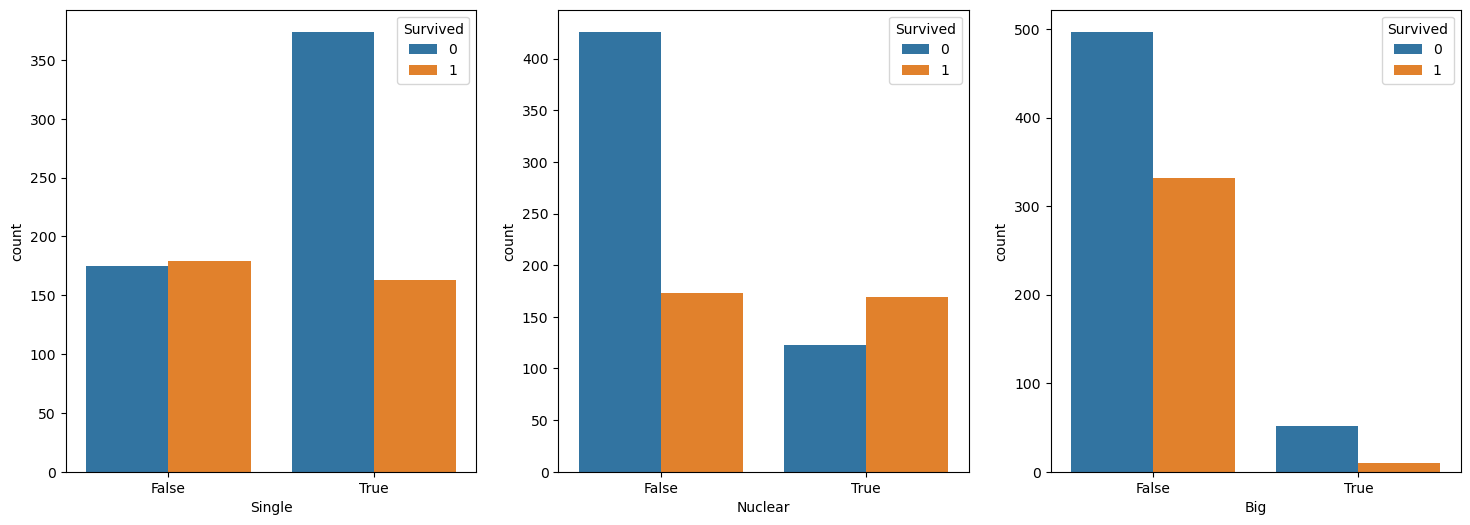

In [16]:
train['Single']=train['FamilySize']==1
train['Nuclear']=(2<=train['FamilySize']) & (train['FamilySize']<=4)
train['Big']=train['FamilySize']>=5

test['Single']=test['FamilySize']==1
test['Nuclear']=(2<=test['FamilySize']) & (test['FamilySize']<=4)
test['Big']=test['FamilySize']>=5

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='Single', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Nuclear', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Big',hue='Survived', ax=ax3) 

In [17]:
train=train.drop(columns=['Single','Big','SibSp','Parch','FamilySize'])
test=test.drop(columns=['Single','Big','SibSp','Parch','FamilySize'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

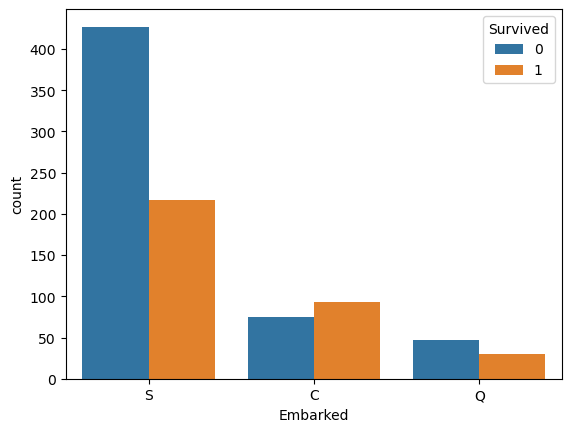

In [18]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [19]:
train['EmbarkedC']=train['Embarked']=='C'
train['EmbarkedS']=train['Embarked']=='S'
train['EmbarkedQ']=train['Embarked']=='Q'
test['EmbarkedC']=test['Embarked']=='C'
test['EmbarkedS']=test['Embarked']=='S'
test['EmbarkedQ']=test['Embarked']=='Q'

train=train.drop(columns='Embarked')
test=test.drop(columns='Embarked')

In [20]:
train['Name']=train['Name'].str.split(', ').str[1].str.split('. ').str[0]
test['Name']=test['Name'].str.split(', ').str[1].str.split('. ').str[0]

<AxesSubplot:xlabel='Name', ylabel='count'>

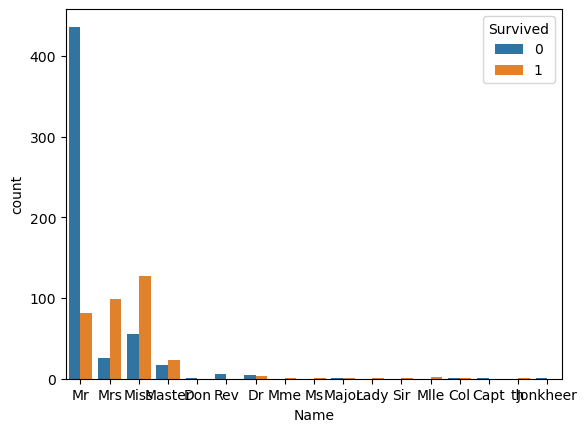

In [21]:
sns.countplot(data=train, x='Name', hue='Survived')

In [22]:
train['Master']=(train['Name']=='Master')
test['Master']=(test['Name']=='Master')

train=train.drop(columns='Name')
test=test.drop(columns='Name')

train=train.drop(columns='Ticket')
test=test.drop(columns='Ticket')

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
Ytrain=train['Survived']
feature_names=list(test)
Xtrain=train[feature_names]
Xtest=test[feature_names]

print(Xtrain.shape, Ytrain.shape, Xtest.shape)
Xtrain.head()

(891, 11) (891,) (418, 11)


,PassengerId,Sex,Fare,Pclass_3,Pclass_2,Pclass_1,Nuclear,EmbarkedC,EmbarkedS,EmbarkedQ,Master
0,1,0,7.2500,True,False,False,True,False,True,False,False
1,2,1,71.2833,False,False,True,True,True,False,False,False
2,3,1,7.9250,True,False,False,False,False,True,False,False
3,4,1,53.1000,False,False,True,True,False,True,False,False
4,5,0,8.0500,True,False,False,False,False,True,False,False


In [25]:
model=DecisionTreeClassifier(max_depth=8, random_state=18)
# random_state is an arbitrary number.
model.fit(Xtrain, Ytrain)
predictions=model.predict(Xtest)
submission['Survived']=predictions
submission.to_csv('Result.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
df1 = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df1.to_csv('gender_submission.csv',index = False)